# KNN exercise with NBA player data

## Introduction

- NBA player statistics from 2014-2015 (partial season): [data](../data/NBA_players_2015.csv), [data dictionary](../slides/06_nba_paper.pdf)
- **Problem to solve:** Predict player position using assists, steals, blocks, turnovers, and personal fouls

## Step 1: Read the data into Pandas

In [1]:
# read the data into a DataFrame named nba
import pandas as pd
path = '../data/'
url = path + 'NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [2]:
# examine the columns names to see what's there
nba.columns

Index(['season_end', 'player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp',
       'fg', 'fga', 'fg_', 'x3p', 'x3pa', 'x3p_', 'x2p', 'x2pa', 'x2p_', 'ft',
       'fta', 'ft_', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP'],
      dtype='object')

In [3]:
# examine the number of players in each position to get a feel for the data
nba['pos'].value_counts()

G    200
F    199
C     79
Name: pos, dtype: int64

## Step 2: Create X and y

Use the following features: assists, steals, blocks, turnovers, personal fouls

In [4]:
# map positions to numbers
# Specifically map the position names (C, F and G) to numbers starting with 0
#   and store them in a new column named 'pos_num'.
# We need to do this because KNN model algorithms require that the features
#   and responses be numeric.
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [5]:
# create feature matrix (X) (it is a dataframe) that contains these columns from the nba dataframe:
# 'ast', 'stl', 'blk', 'tov', 'pf'
X=nba[['ast', 'stl', 'blk', 'tov', 'pf']]
X.head()

,ast,stl,blk,tov,pf
0,1.0,0.4,0.3,0.9,2.2
1,0.4,0.4,0.3,0.4,0.8
2,1.0,0.4,1.2,1.6,3.0
3,0.9,0.2,0.5,0.5,1.8
4,1.9,0.6,0.1,1.6,2.1


In [7]:
# create response vector (y) that contains the position numbers (our labels)
y=nba['pos_num']
y.head()

0    1
1    2
2    0
3    1
4    2
Name: pos_num, dtype: int64

## Step 3: Train a KNN model (K=5)

In [8]:
# import KNN class we need from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# instantiate the estimator with K=5
knn = KNeighborsClassifier(n_neighbors=5)

In [10]:
# run a knn.fit on the data to build the model
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Step 4: Use the model:
## Predict player position and calculate predicted probability of each position

Predict for a player with these statistics: 1 assist, 1 steal, 0 blocks, 1 turnover, 2 personal fouls

In [11]:
# create a list to represent a player
player = [1, 1, 0, 1, 2]

In [12]:
# make a prediction with the model
knn.predict(player)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2])

In [13]:
# calculate the predicted probabilities
knn.predict_proba(player)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0. ,  0.2,  0.8]])

## Step 5: Repeat steps 3 and 4 using K=50

In [14]:
# repeat for K=50
knn = KNeighborsClassifier(n_neighbors=50)

In [17]:
# calculate predicted probabilities
knn.fit(X,y)
knn.predict(player)
knn.predict_proba(player)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.06,  0.62,  0.32]])

## Bonus: Explore the features to ones ones that likely are the most predictive

In [18]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [40]:
# get a count of assists grouped by position.  Use .unstack() to format the output
assists = nba.groupby('pos')['ast'].count()
assists

pos
C     79
F    199
G    200
Name: ast, dtype: int64

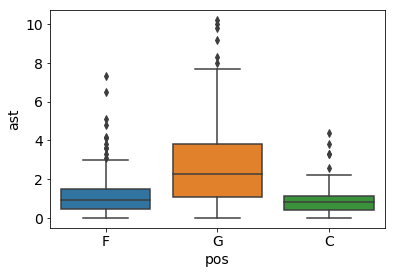

In [42]:
# box plot of assists grouped by position
import seaborn as sns
sns.boxplot(x='pos',y='ast',data=nba)

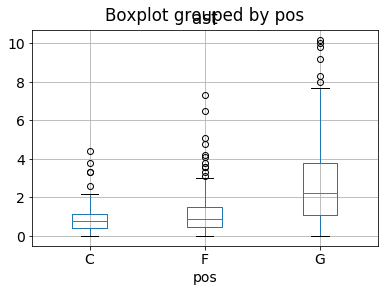

In [68]:
nba.boxplot(column='ast', by='pos')

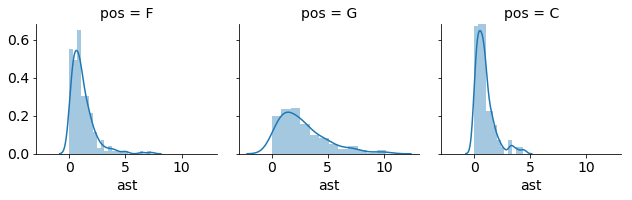

In [64]:
# group plot of histograms of assists grouped by position
g = sns.FacetGrid(nba, col='pos')
g.map(sns.distplot,'ast')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b9e2f60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bc9e198>]], dtype=object)

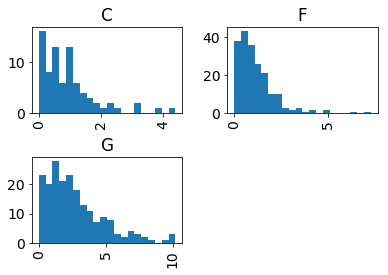

In [61]:
nba.hist(column='ast', by='pos',bins=20) 
#panda built in